# Project: Investigate a Dataset (No-show appointments dataset!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>"Gender" indicates the gender of the patient.

>"ScheduledDay" tells us on what day the patient set up their appointment.

>"Appointment" tells us on what day the appointment.

>"Age" indicates the age of the patient.

>"Neighborhood" indicates the location of the hospital.

>"Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>"Hipertension" indicates if the patient have hypertension or not (0= No hypertension, 1= Hypertension).

>"Diabetes" indicates if the patient have diabetes or not (0= No diabetes, 1= Diabetes).

>"Alcoholism" indicates if the patient have alcoholic or not (0= Not alcoholic, 1= Alcoholic).

>"Handcap" indicates if the patient is handcap or not (0= No handcap, 1,2,3,4= Handcap).

>"SMS_received" indicates if the patient received SMS or not (0= No SMS, 1= SMS).

>"No-show" says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

<a id='intro'></a>
## Research Questions

>1-What is the ratio of No-Show among all patients?

>2-What is the effect of gender on the tendency of No-Show?

>3-What is the effect of age on the tendency of No-Show?

>4-What is the effect of the time gap between scheduled day and appointment day on the tendency of No-Show?

>5-What is the effect of receiving SMS with the appointment on the tendency of No-Show?

>6-What is the effect of being enrolled in the Brasilian welfare program Borsa Familia on the tendency of No-Show?

>7-What is the effect of the patient health status on the rate of No-Show?

>8-What is the most neighbourhoods that shows a hieghr rate of No-Show and Show up?

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [1]:
# First I will import the libraries I need for data analysis
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')

In [2]:
# Loading data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('no_show_appointments.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates()

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2       2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3       2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
...                      ...  ...                ...          ...   
110522  2016-06-07T00:00:00Z   56        MARIA ORTIZ            0   
110523  2016-06-07T00:00:00Z   51        MARIA ORTIZ            0   
110524  2016-06-07T00:00:00Z   21        MARIA ORTIZ            0   
110525  2016-06-07T00:00:00Z   38        MARIA ORTIZ            0   
110526  2016-06-07T00:00:00Z   54        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0                  1         0           0        0             0      No  
1                  0         0           0        0             0      No  
2                  0         0           0        0             0      No  
3                  0         0           0        0             0      No  
4                  1         1           0        0             0      No  
...              ...       ...         ...      ...           ...     ...  
110522             0         0           0        0             1      No  
110523             0         0           0        0             1      No  
110524             0         0           0        0             1      No  
110525             0         0           0        0             1      No  
110526             0         0           0        0             1      No  

[110527 rows x 14 columns]

### Data Cleaning
From the information of data, I need to rename columns, change some columns data types, creating new columns of further needed information based on the data provided in the dataset.

In [7]:
# First I will rename columns to be lowercase and make some changes to facilitate working with data
df.rename(columns=lambda x: x.lower().replace('-','_'),inplace=True)

In [8]:
# I will change the data type for the columns "scheduledday" and "appointmentday" fromobject to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [9]:
# I will make a new column "time_to_appointment" to calculate the difference between appointment day and scheduled day and converting the data type to int
df['time_to_appointment'] = (df.appointmentday - df.scheduledday).dt.days

In [10]:
# I will drop the not needed columns from the dataset
df.drop(['patientid', 'appointmentid'], axis=1, inplace= True)

In [11]:
df.head()

gender              scheduledday            appointmentday  age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handcap  sms_received no_show  time_to_appointment  
0        0             0      No                   -1  
1        0             0      No                   -1  
2        0             0      No                   -1  
3        0             0      No                   -1  
4        0             0      No                   -1

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is the ratio of No-Show among all patients?)

In [12]:
# Exploring the data set to know the ratio of No-Show
# First I will define a function to explore each category histogram
def plot_histogram( df, zvar, bins= 30, figsize= [14, 6]):
    ''' This function to plot the histogram for each category
    '''
    #plot
    df[zvar].hist(bins= bins, grid= False, edgecolor= 'black', figsize= figsize)
    #Add space instead of underscore for labels
    zvar = zvar.replace('_', " ")
    #Add tiltle and format it
    plt.title(f'distribution of {zvar}'.title(), fontsize= 14, weight= 'bold')
    #Add xlabel and format it
    plt.xlabel(zvar.title(), fontsize= 10, weight= 'bold')
    #Add ylabel and format it
    plt.ylabel('frequancy'.title(), fontsize= 10, weight= 'bold')


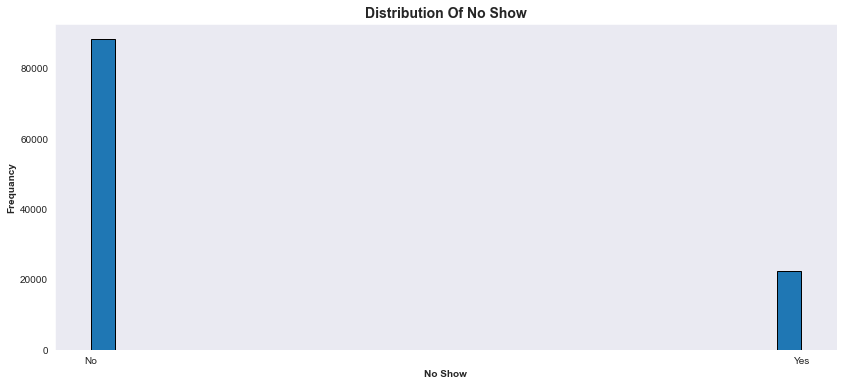

In [13]:
plot_histogram(df, 'no_show')

In [14]:
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [15]:
# Calculating the ratio of No-Show
no_show_ratio = int(df.query('no_show == "Yes"').shape[0] / df.shape[0] *100)
print('The No-Show ratio is {}%'.format(no_show_ratio))

The No-Show ratio is 20%


### Research Question 2 (What is the effect of gender on the tendency of No-Show?)

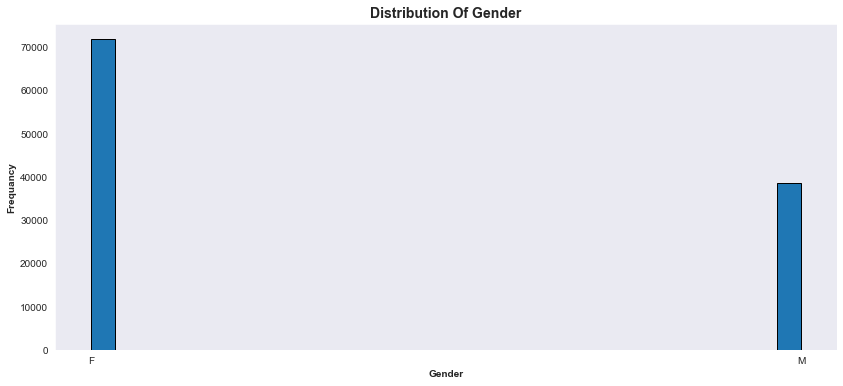

In [16]:
# Exploring the data set to know the effect of gender on the tendency of No-Show
plot_histogram(df, 'gender')

In [17]:
df.groupby('gender')['no_show'].value_counts()

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [18]:
# I will create a function to plot the results of value counts
def plot_the_result(df, xvar):
    '''
    This function plot the value counts resulted from groupby function to spot the differnces between independant variable based on dependant variable
    '''
    # plot
    df.groupby(xvar)['no_show'].value_counts(normalize=True).unstack(xvar).plot.bar(edgecolor= 'black', figsize= [14, 8], rot=0, width= 0.9, color= ['yellow', 'green'])
    # Replacing underscore with space and format labels
    var = xvar.replace('_', ' ')
    # Add title and format it
    plt.title(f'Ratio of Show and No-Show in each {xvar} group'.title(), fontsize= 14, weight= 'bold')
    # Add xlabel and format it
    plt.xlabel(xvar.title(), fontsize= 10, weight= 'bold')
    # Add ylabel and format it
    plt.ylabel('No-Show Ratio'.title(), fontsize= 10, weight= 'bold')
    # Add legand and format it
    plt.legend(loc= 'center left', bbox_to_anchor= (1, 0.5), title= xvar.title(), title_fontsize= 12)

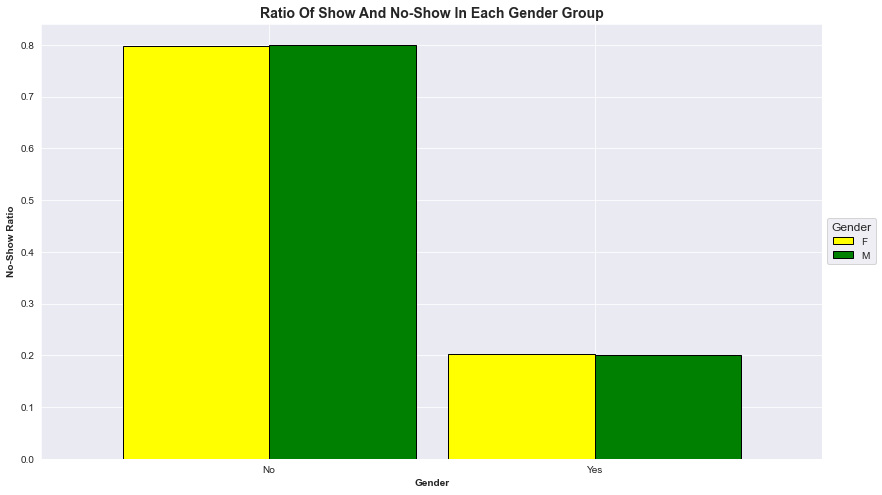

In [19]:
plot_the_result(df, 'gender')

From the graph, it seems that gender has no influence on tendency to miss the appointment as the ratio is consistant among both genders.

### Research Question 3 (What is the effect of age on the tendency of No-Show?)

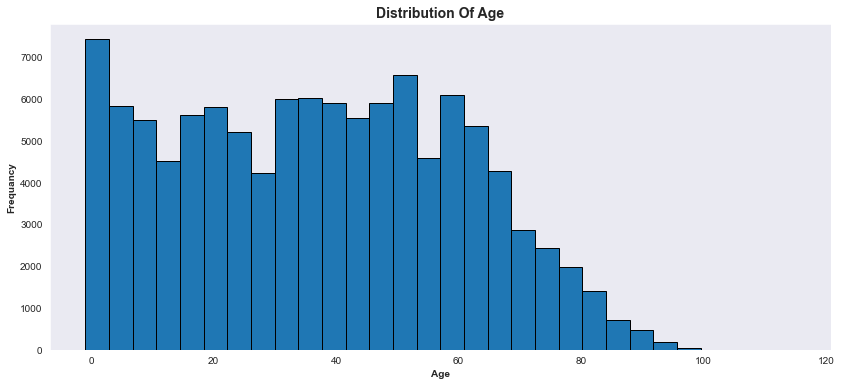

In [20]:
#First I will explore some information about age
plot_histogram(df, 'age')

The age is distrebuted normally in the groups below 55 years old while it is skewed in the above 55 group, I will investigate the ratio of No-Show among each age group.

In [21]:
df.describe().age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

>25% of patients are 18 years old or less.

>50% of patients are between 18 and 55 years old.

>25% of patients are 55 years old or more.

Based on the stastical informations, I will devide the patient to 3 groups depending on age to spot the effect of the age on the No-Show rate.

young_age group : 0:18 years old

moderate_age group: 19:55 years old

old_age group: 56:115 years old

In [22]:
# Creating a new column to devide the age groups into 3 groups
df['age_group']= pd.cut(df['age'], [0, 18, 55, 115], labels= ['young_age', 'moderate_age', 'old_age'], include_lowest= True)

Text(0, 0.5, 'No-Show Ratio')

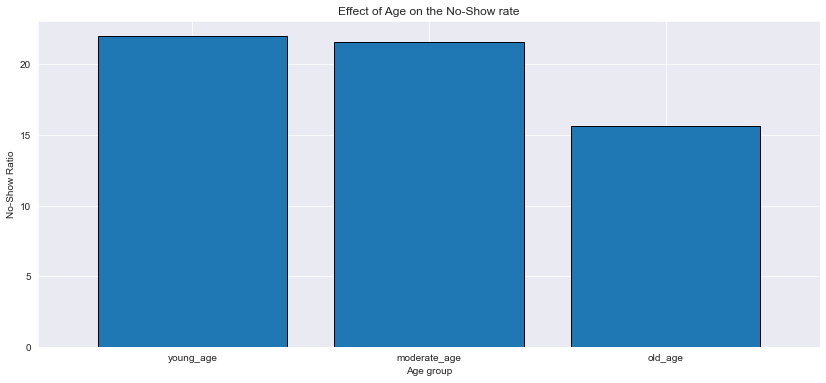

In [23]:
# Groupby age groups 
# Get proportion of Show / No show, multiply by 100, round
# Unstack no_show
age_group_data = df.groupby('age_group')['no_show'].value_counts(normalize= True).mul(100).round(2).unstack()

# plot the proportion of No show
age_group_data['Yes'].plot.bar(edgecolor= 'black', figsize= [14, 6], rot=0, width= 0.8)
plt.title('Effect of Age on the No-Show rate')
plt.xlabel('Age group')
plt.ylabel('No-Show Ratio')

From the graph, the No-Show ratio is consistant among 75% of patients within age 55 years or less, and it shows a decrease about 5% in the age group of 56 years or more.

### Research Question 4 (What is the effect of the time gap between scheduled day and appointment day on the tendency of No-Show?)

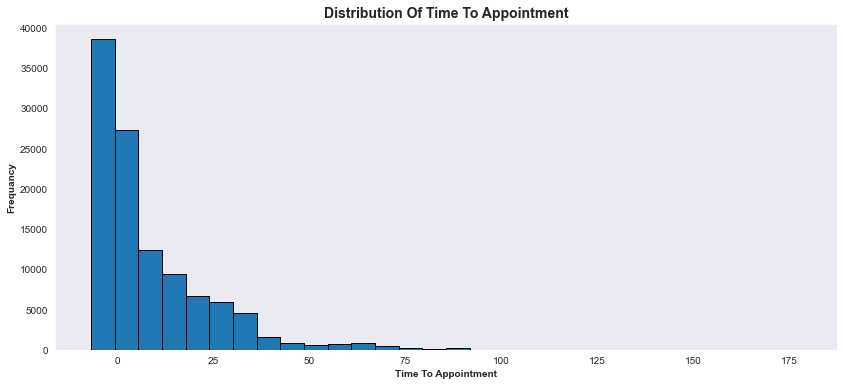

In [24]:
# Exploring the time to appointment statistical information
plot_histogram(df, 'time_to_appointment')

In [25]:
df.time_to_appointment.value_counts()

-1      38563
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: time_to_appointment, Length: 131, dtype: int64

In [26]:
df.time_to_appointment.describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: time_to_appointment, dtype: float64

From the information provided, 25% of appointments are booked in the sameday and in some cases the appointment is booked after the visit.
50% of the appointments are booked 3 days or less before the visit.
25% of the appointments are booked 14 days or more before visit up to maximum of 178 days before visit. I will invistegate the affect of time before visit on the tendency of No-Show.

I will devide time to appointment to 3 groups based on the statistical information:

short_waiting : 0:3 days

moderate_waiting: 4:14 days

long_waiting : > 15


In [27]:
# Creating a new column to devide the time to appointment into 3 groups
df['waiting_time']= pd.cut(df['time_to_appointment'], [0, 3, 14, df['time_to_appointment'].max()], labels= ['short_waiting', 'moderate_waiting', 'long_waiting'], include_lowest= True)

Text(0, 0.5, 'No-Show Ratio')

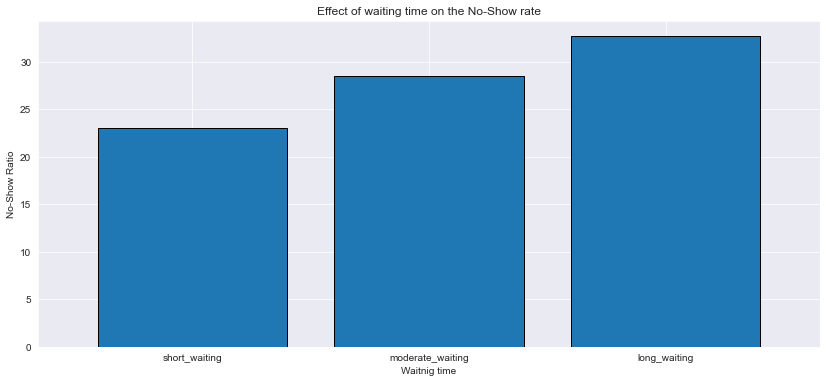

In [28]:
# Groupby waiting time groups 
# Get proportion of Show / No show, multiply by 100, round
# Unstack no_show
waiting_time_data = df.groupby('waiting_time')['no_show'].value_counts(normalize= True).mul(100).round(2).unstack()

# plot the proportion of No show
waiting_time_data['Yes'].plot.bar(edgecolor= 'black', figsize= [14, 6], rot=0, width= 0.8)
plt.title('Effect of waiting time on the No-Show rate')
plt.xlabel('Waitnig time')
plt.ylabel('No-Show Ratio')

From the graph, it seems that the ratio of No-Show is maybe affected by the waiting days to appointment, the more waiting the more tendency to No-Show. 

### Research Question 5 (What is the effect of receiving SMS with the appointment on the tendency of No-Show?)

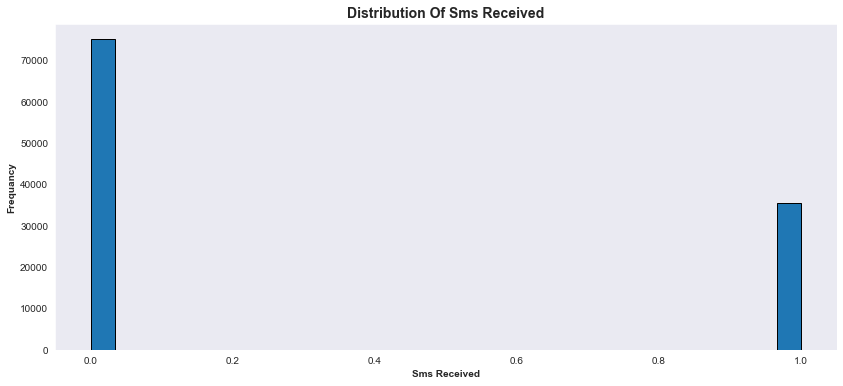

In [29]:
# Exploring the SMS receiving statistical information
plot_histogram(df, 'sms_received')

In [30]:
df.groupby('sms_received')['no_show'].value_counts()

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

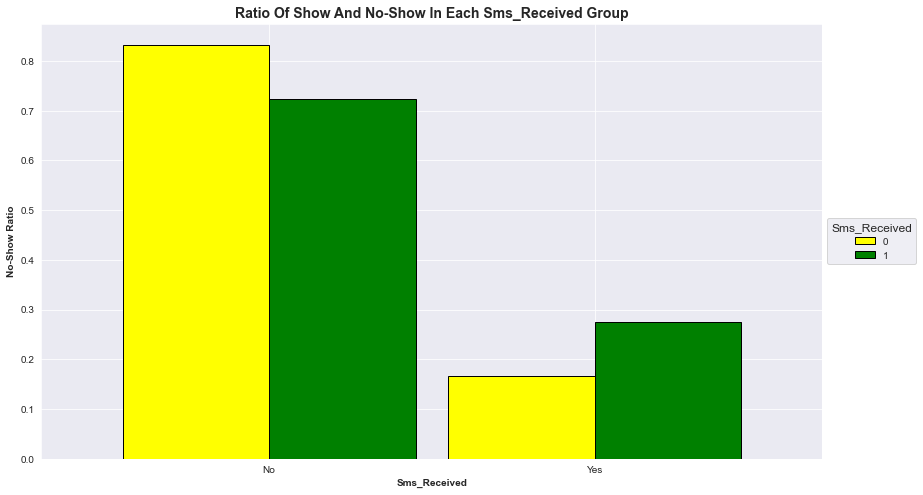

In [31]:
# Plot the results of value counts using the created function
plot_the_result(df, 'sms_received')

From the graph, it is clear that receiving SMS dosen't motivate the appointment show up as the ratio for recieving SMS and No-Show is higher than that not received SMS.

### Research Question 6 (What is the effect of being enrolled in the Brasilian welfare program Borsa Familia on the tendency of No-Show?)

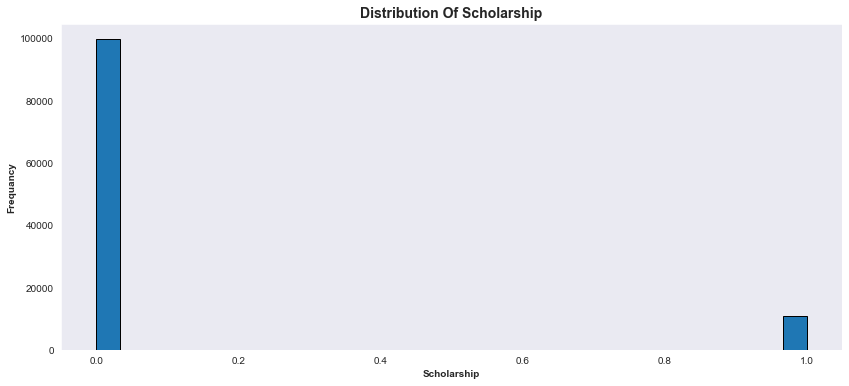

In [32]:
# Exploring the scholarship data
plot_histogram(df, 'scholarship')

In [33]:
df.groupby('scholarship')['no_show'].value_counts()

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

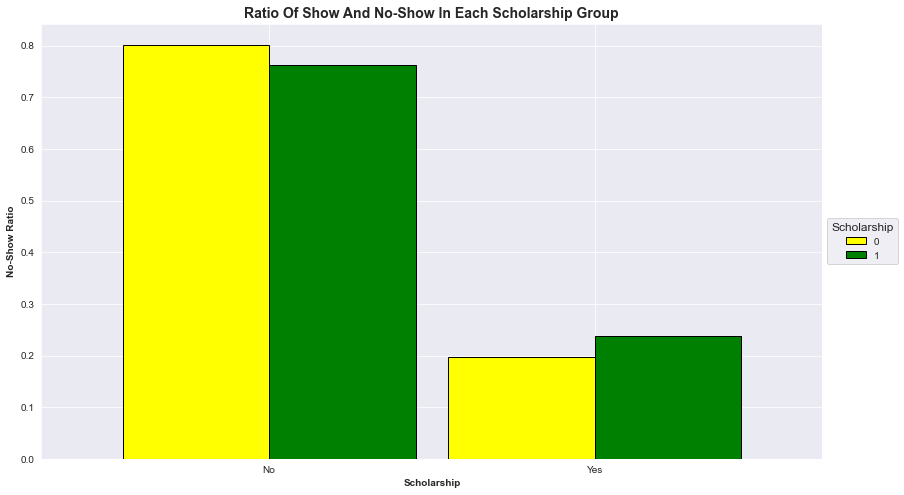

In [34]:
# Plot the results of value counts using the created function
plot_the_result(df, 'scholarship')

From the graph, the ratio of No-Show shows a slight increase in the group of patients who enrolled in the welfar program.

### Research Question 7 (What is the effect of the patient health status on the rate of No-Show?)

I will investigate the effect of patient health status like( Hypertension, Diabetes, Handcap, Alcoholism) on the rate of No-Show.

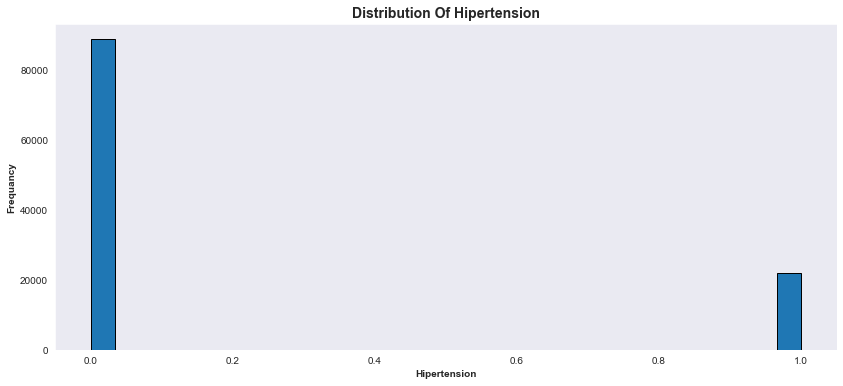

In [35]:
# Exploring some data about health status factors
plot_histogram(df, 'hipertension')

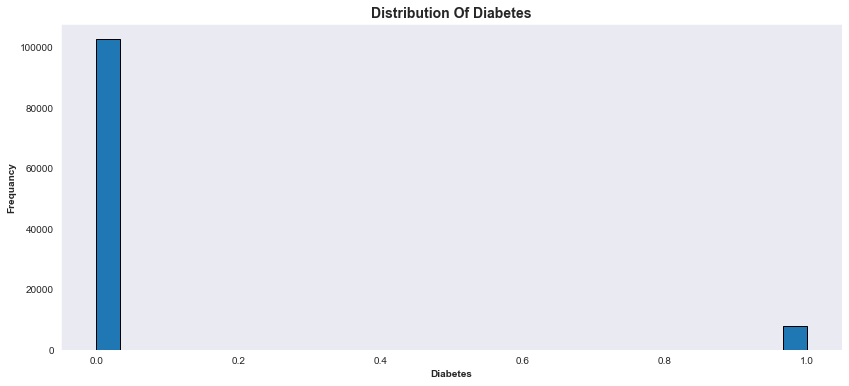

In [36]:
plot_histogram(df, 'diabetes')

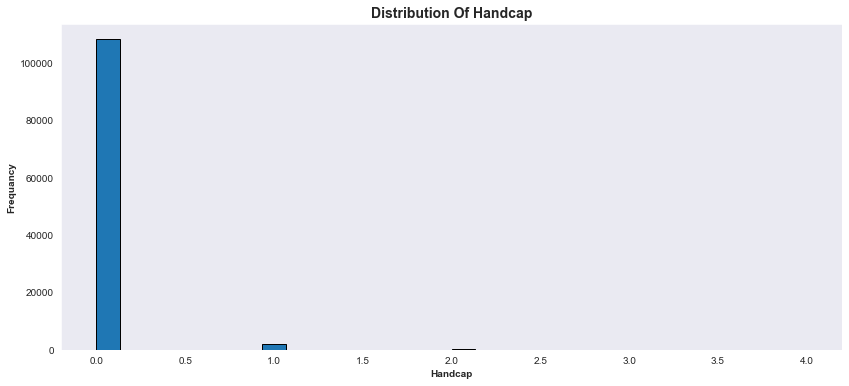

In [37]:
plot_histogram(df, 'handcap')

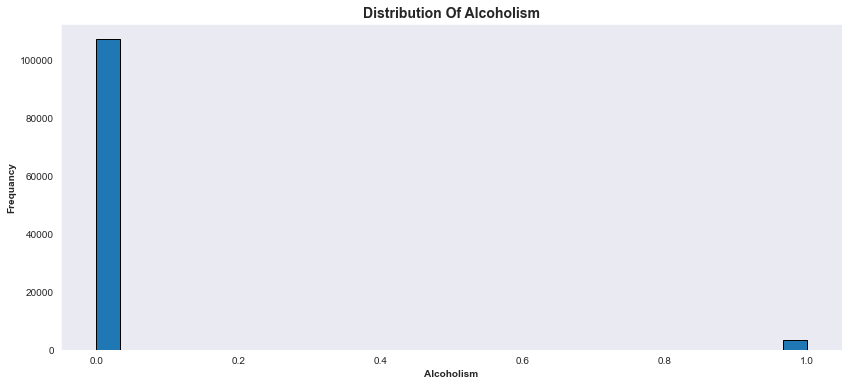

In [38]:
plot_histogram(df, 'alcoholism')

I will investigate the ratio of No-Show data through each factor

In [51]:
# Filter the dataframe for No-Show data
no_show_data = df.query('no_show == "Yes"')

In [40]:
# Calculating the number of No-Show in each group
no_show_hipertension = no_show_data.query('hipertension == 1').shape[0]
no_show_diabetes = no_show_data.query('diabetes == 1').shape[0]
no_show_handcap = no_show_data.query('handcap != 0').shape[0]
no_show_alcoholism = no_show_data.query('alcoholism == 1').shape[0]

In [41]:
# Calculating the total number for each group
total_hipertension = df.query('hipertension ==1').shape[0]
total_diabetes = df.query('diabetes == 1').shape[0]
total_handcap = df.query('handcap != 0').shape[0]
total_alcoholism = df.query('alcoholism == 1').shape[0]

In [42]:
# Calculating the No-Show ratio for each group
hipertension_ratio = no_show_hipertension / total_hipertension *100
diabetes_ratio = no_show_diabetes / total_diabetes *100
handcap_ratio = no_show_handcap / total_handcap *100
alcoholism_ratio = no_show_alcoholism / total_alcoholism *100

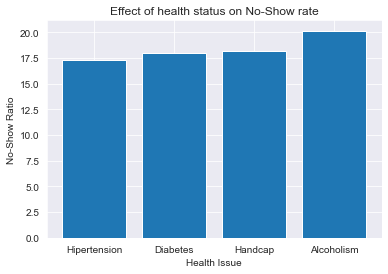

In [43]:
# Plotting the results
locations = [1, 2, 3, 4]
heights = [hipertension_ratio, diabetes_ratio, handcap_ratio, alcoholism_ratio]
labels = ['Hipertension', 'Diabetes', 'Handcap', 'Alcoholism']
plt.bar(locations, heights, tick_label= labels)
plt.title('Effect of health status on No-Show rate')
plt.xlabel('Health Issue')
plt.ylabel('No-Show Ratio');

From the graph, There is a slight decrease in the rate of No-Show in "Hypertension", "Diabetes" and "Handcap" groups, while the ratio in "Alcoholism" group is the same like the general ratio of No-Show, which suggest that alcoholism has no effect on the rate of No-Show.

### Research Question 8 (What is the most neighbourhoods that shows a hieghr rate of No-Show and Show up?)

In [44]:
# Exploring some information about neighbourhood
df.groupby('neighbourhood')['no_show'].value_counts()

neighbourhood    no_show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1741
                 Yes         521
ANTÔNIO HONÓRIO  No          221
                            ... 
TABUAZEIRO       Yes         573
UNIVERSITÁRIO    No          120
                 Yes          32
VILA RUBIM       No          710
                 Yes         141
Name: no_show, Length: 160, dtype: int64

In [45]:
# Finding the top ten neighbourhoods with higher rate of No-Show
top_ten_no_show = no_show_data.neighbourhood.value_counts()[ : 10]
top_ten_no_show

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: neighbourhood, dtype: int64

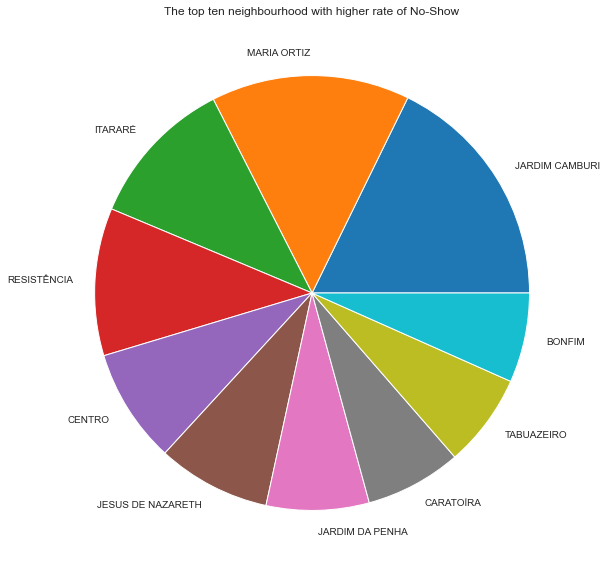

In [52]:
# plotting the top ten neighbourhoods with higher rate of No-Show
top_ten_no_show.plot(kind= 'pie', figsize= (10, 10))
plt.title('The top ten neighbourhood with higher rate of No-Show')
plt.ylabel('');

In [47]:
# Filter the dataframe for Show data
show_data = df.query('no_show == "No"')

In [48]:
# Finding the top ten neighbourhoods with higher rate of Show up
top_ten_show = show_data.neighbourhood.value_counts()[ : 10]
top_ten_show

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: neighbourhood, dtype: int64

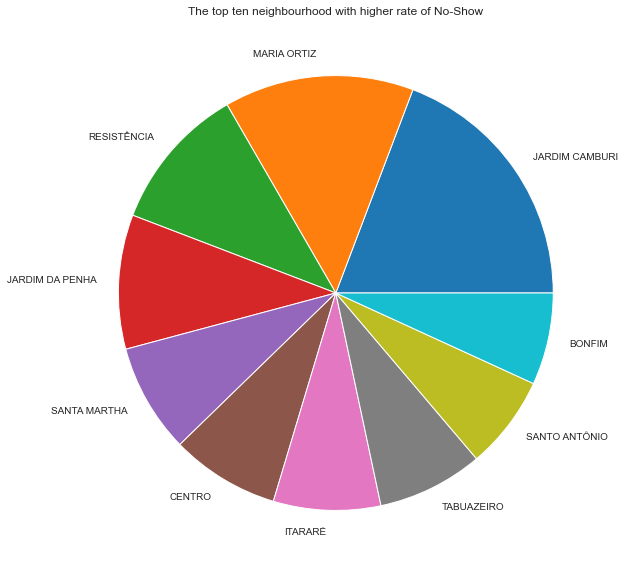

In [53]:
# plotting the top ten neighbourhoods with higher rate of No-Show
top_ten_show.plot(kind= 'pie', figsize= (10, 10))
plt.title('The top ten neighbourhood with higher rate of No-Show')
plt.ylabel('');

JARDIM CAMBURI is the top neighbourhood that showed the highest rate of Show Up and No-Show, which suggests that neighbourhood does not related to Show up and No-Show.

<a id='limitation'></a>
## Limitations

> The data provided include a lot of information, however it has some limitations. The data set has a huge difference between samples in each groups like "Hypertension", "Diabetes", 'alcoholism" and "Scholarship", and even in factors like "gender" and "SMS Received", there is still a big difference between samples which reflect on the accuracy of the analysis.

> The data didn't contain the reason of the visit to pridect the importance of the appointment to the patient which may reflect on the rate of Show-Up.

> The duration of data is limited to less than a year.

> The results is related to the sample which implies uncertainty (a different sample may lead to different results).

> There is no statistical inference performed in this analysis (to test the significance of the results).

<a id='conclusions'></a>
## Conclusions

>The general No-Show ratio among all patient is 20%.

>It seems that gender has no influence on tendency to miss the appointment as the ratio is consistant among both genders.

>25% of patients are 18 years old or less, 50% of patients are between 18 and 55 years old, 25% of patients are 55 years old or more.

>The No-Show ratio is consistant among 75% of patients within age 55 years or less, and it shows a decrease about 5% in the age group of 56 years or more.

>25% of appointments are booked in the sameday and in some cases the appointment is booked after the visit.
50% of the appointments are booked 3 days or less before the visit.
25% of the appointments are booked 14 days or more before visit up to maximum of 178 days before visit.

>It seems that the ratio of No-Show is directly affected by the waiting days to appointment, the more waiting the more tendency to No-Show. 

>It is clear that receiving SMS dosen't motivate the appointment show up as the ratio for recieving SMS and No-Show is higher than that not received SMS.

>The ratio of No-Show shows a slight increase in the group of patients who enrolled in the welfar program, which suggest that beig enrolled in the welfar program dose not motivate show up to the appointment.

>There is a slight decrease in the rate of No-Show in "Hypertension", "Diabetes" and "Handcap" groups, while the ratio in "Alcoholism" group is the same like the general ratio of No-Show, which suggest that being in risky health status slightly motivate show up to the appointment, while alcoholism has no effect on the rate of No-Show.

>JARDIM CAMBURI is the top neighbourhood that showed the highest rate of Show Up and No-Show, which suggests that neighbourhood does not related to Show up and No-Show.

>Finally, it is hard to pridect the real cause of No-Show from the available data, further investigation is needed with more data to analyze.